# Sampling Patches from Training Images

In [2]:
# Leave lines below uncommented this if you get:
# OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5md.dll already initialized.
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import torch
import torch.nn
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [3]:
from glomerulus import Glomerulus, Patch, KidneySampleDataset, generate_patches

In [4]:
image_names = [
    'afa5e8098',
    '4ef6695ce',
    'c68fe75ea',
    '26dc41664',
    '095bf7a1f',
    '54f2eec69',
    '1e2425f28',
    'e79de561c',
    'cb2d976f4',
    'b9a3865fc',
    '8242609fa',
    '0486052bb',
    '2f6ecfcdf',
    'b2dc8411c',
    'aaa6a05cc'
]

root_dir = './dataset/train'

patch_size = 512 # Size of each patches (patch_size x patch_size)
num_samples = 1000 # Number of samples taken from each image

dataset_dir = './sampled_data'

In [4]:
patches = []
# Glomerulus-based Sampling
for idx, image_name in enumerate(tqdm(image_names, desc='Glom Sampling')):
    image_path = os.path.join(root_dir, f'{image_name}.tiff')
    label_path = os.path.join(root_dir, f'{image_name}.json')
    try:
        # Sample patches from the image
        patches = generate_patches(
            patch_size = patch_size,
            num_samples = num_samples,
            image_path = image_path,
            label_path = label_path,
            # Dataset ratio config
            glomerulus_patch_ratio = 1,
            random_patch_ratio = 0,
            empty_patch = 0
        )
        
        # Create a dataset object from sampled patches and save as chunk file
        dataset = KidneySampleDataset(patches)
        dataset.save(os.path.join(dataset_dir, f'{image_name}_glom_chunk_{num_samples}.npy'))
    except:
        print('Error generating patches {image_path}')

# Random Sampling
for idx, image_name in enumerate(tqdm(image_names, desc='Rndm Sampling')):
    image_path = os.path.join(root_dir, f'{image_name}.tiff')
    label_path = os.path.join(root_dir, f'{image_name}.json')
    try:
        # Sample patches from the image
        patches = generate_patches(
            patch_size = patch_size,
            num_samples = num_samples,
            image_path = image_path,
            label_path = label_path,
            # Dataset ratio config
            glomerulus_patch_ratio = 0,
            random_patch_ratio = 1,
            empty_patch = 0
        )
        
        # Create a dataset object from sampled patches and save as chunk file
        dataset = KidneySampleDataset(patches)
        dataset.save(os.path.join(dataset_dir, f'{image_name}_rndm_chunk_{num_samples}.npy'))
    except:
        print('Error generating patches {image_path}')

Glom Sampling:   0%|          | 0/15 [00:00<?, ?it/s]

/home/patipol/Documents/automated-visual-acuity-tester/speech-model/whisper_env/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rndm Sampling:   0%|          | 0/15 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

Rendering Patches:   0%|          | 0/1000 [00:00<?, ?it/s]

In [5]:
# Load dataset chunks and split for train and val

total_samples = {}
for file_name in os.listdir(dataset_dir):
    if not 'chunk' in file_name:
        continue
    chunk_type = file_name.split('_')[1]
    chunk_length = int(file_name.split('_')[3].split('.')[0])

    if not chunk_type in total_samples:
        total_samples[chunk_type] = chunk_length
    else:
        total_samples[chunk_type] += chunk_length

print(f'Total Data Samples: {total_samples}')

Total Data Samples: {'rndm': 15000, 'glom': 15000}


In [7]:
# Sample 7500 files from each type
num_samples = 500

glom_dataset = KidneySampleDataset()
for file_name in tqdm(os.listdir(dataset_dir)):
    if not 'chunk' in file_name:
        continue

    file_path = os.path.join(dataset_dir, file_name)
    chunk_type = file_name.split('_')[1]
    chunk_length = int(file_name.split('_')[3].split('.')[0])

    if chunk_type == 'glom':
        tmp_dataset = KidneySampleDataset()
        tmp_dataset.load(file_path)
        glom_dataset.append_data(tmp_dataset.random_sample(num_samples))
        
glom_dataset.shuffle()
glom_dataset.save(os.path.join(dataset_dir, f'glom_7500.npy'))
del glom_dataset

rndm_dataset = KidneySampleDataset()
for file_name in tqdm(os.listdir(dataset_dir)):
    if not 'chunk' in file_name:
        continue

    file_path = os.path.join(dataset_dir, file_name)
    chunk_type = file_name.split('_')[1]
    chunk_length = int(file_name.split('_')[3].split('.')[0])

    if chunk_type == 'rndm':
        tmp_dataset = KidneySampleDataset()
        tmp_dataset.load(file_path)
        rndm_dataset.append_data(tmp_dataset.random_sample(num_samples))

rndm_dataset.shuffle()
rndm_dataset.save(os.path.join(dataset_dir, f'rndm_7500.npy')) 
del rndm_dataset

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

In [9]:
glomerulus_patch_ratio = 0.6
random_patch_ratio = 0.4

train_split = 0.8
num_samples = 1000

# Create small dataset for finetuning
finetune_dataset = KidneySampleDataset()

# Sample from glom dataset
glom_dataset = KidneySampleDataset()
glom_dataset.load(os.path.join(dataset_dir, f'glom_7500.npy'))
finetune_dataset.append_data(glom_dataset.random_sample(int(num_samples * glomerulus_patch_ratio)))
del glom_dataset

# Sample from rndm dataset
rndm_dataset = KidneySampleDataset()
rndm_dataset.load(os.path.join(dataset_dir, f'rndm_7500.npy'))
finetune_dataset.append_data(rndm_dataset.random_sample(num_samples - int(num_samples * glomerulus_patch_ratio)))
del rndm_dataset

In [11]:
finetune_dataset.shuffle()
finetune_dataset.save(os.path.join(dataset_dir, f'0.6_0.4_1000.npy'))

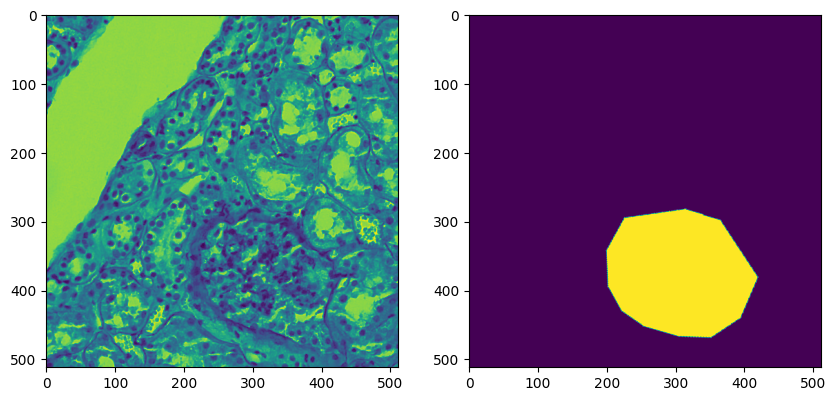

In [20]:
# Test print
random_sample = finetune_dataset.random_sample(1)[0]
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(random_sample[0])
axes[1].imshow(random_sample[1])
plt.show()

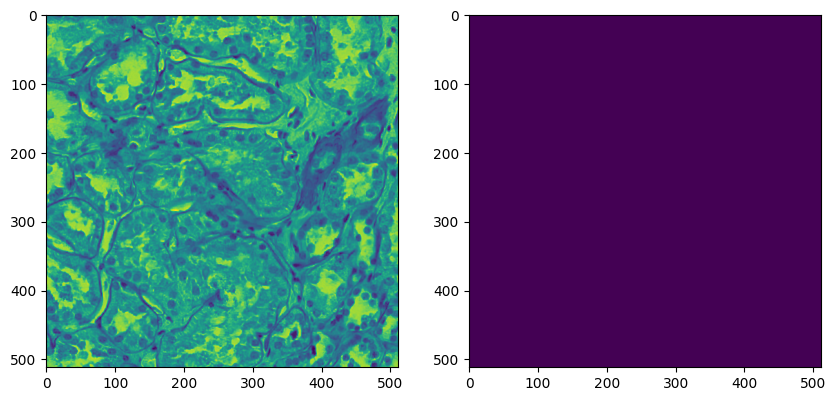

In [35]:
# Test print
random_sample = finetune_dataset.random_sample(1)[0]
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(random_sample[0])
axes[1].imshow(random_sample[1])
plt.show()

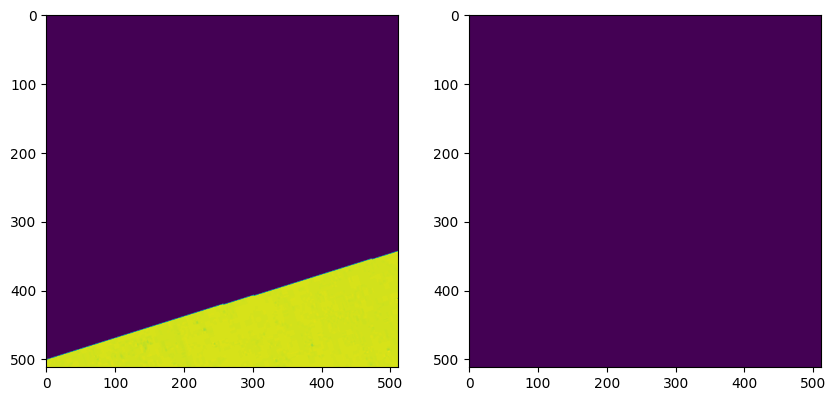

In [25]:
# Test print
random_sample = finetune_dataset.random_sample(1)[0]
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(random_sample[0])
axes[1].imshow(random_sample[1])
plt.show()

In [26]:
glomerulus_patch_ratio = 0.6
random_patch_ratio = 0.4

train_split = 0.8
num_samples = 5000

# Create main dataset
main_dataset = KidneySampleDataset()

# Sample from glom dataset
glom_dataset = KidneySampleDataset()
glom_dataset.load(os.path.join(dataset_dir, f'glom_7500.npy'))
main_dataset.append_data(glom_dataset.random_sample(int(num_samples * glomerulus_patch_ratio)))
del glom_dataset

# Sample from rndm dataset
rndm_dataset = KidneySampleDataset()
rndm_dataset.load(os.path.join(dataset_dir, f'rndm_7500.npy'))
main_dataset.append_data(rndm_dataset.random_sample(num_samples - int(num_samples * glomerulus_patch_ratio)))
del rndm_dataset

In [27]:
main_dataset.shuffle()
main_dataset.save(os.path.join(dataset_dir, f'0.6_0.4_5000.npy'))

In [31]:
# Temporary stuffs, for reloading imported files
from importlib import reload
reload(glomerulus)
from glomerulus import Glomerulus, Patch, KidneySampleDataset, generate_patches